# Wed. 29th or Tues 28 of Nov

Mike and I met in my office. Looked at annual plots of inventories.
Then saw a big dip in annual data that will be missed on cencus data.
So, here we model annual data.


On Dec 5. Mike and I had a follow up and talked about the next step.

- **Hypothesis** Decline in inventory from time $t$ to $t+1$ if ```NPP``` at $t$ was below average.

What about lag tho? He had mentioned earlier maybe people make changes 3 years after a drought.

- Annual State Level
- Add Washington, Utah, Arizona, Nevada
- Find some examples that inventory goes down sharply at time $t+1$ and look at NPP at time $t$.

- $y-$variable should be deltas: $y_{t+1} = I_{t+1} - I_t$ where $I$ is for inventory.
Under this scenario independent variables can be also deltas or $x_t$ corresponds to $y_{t+1}$. In this notebook
we will go with the former scenario.


In [1]:
import shutup

shutup.please()

import pandas as pd
import numpy as np
from datetime import datetime
import os, os.path, pickle, sys
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

sys.path.append("/Users/hn/Documents/00_GitHub/Rangeland/Python_Codes/")
import rangeland_core as rc

In [2]:
data_dir_base = "/Users/hn/Documents/01_research_data/RangeLand/Data/"
census_population_dir = data_dir_base + "census/"
# Shannon_data_dir = data_dir_base + "Shannon_Data/"
# USDA_data_dir = data_dir_base + "/NASS_downloads/"
param_dir = data_dir_base + "parameters/"
Min_data_base = data_dir_base + "Min_Data/"
reOrganized_dir = data_dir_base + "reOrganized/"

# Read

In [3]:
SoI = [
    "Alabama",
    "Arizona",
    "Arkansas",
    "California",
    "Colorado",
    "Florida",
    "Georgia",
    "Idaho",
    "Illinois",
    "Iowa",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Mississippi",
    "Missouri",
    "Montana",
    "Nebraska",
    "Nevada",
    "New Mexico",
    "North Dakota",
    "Oklahoma",
    "Oregon",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Utah",
    "Virginia",
    "Washington",
    "Wyoming",
]

abb_dict = pd.read_pickle(param_dir + "state_abbreviations.sav")
SoI_abb = []
for x in SoI:
    SoI_abb = SoI_abb + [abb_dict["full_2_abb"][x]]

In [4]:
county_id_name_fips = pd.read_csv(Min_data_base + "county_id_name_fips.csv")
county_id_name_fips.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

county_id_name_fips = county_id_name_fips[county_id_name_fips.state.isin(SoI_abb)].copy()

county_id_name_fips.sort_values(by=["state", "county"], inplace=True)

county_id_name_fips = rc.correct_Mins_FIPS(df=county_id_name_fips, col_="county")
county_id_name_fips.rename(columns={"county": "county_fips"}, inplace=True)

county_id_name_fips.reset_index(drop=True, inplace=True)
print(len(county_id_name_fips.state.unique()))
county_id_name_fips.head(2)

29


,county_fips,county_name,fips,state
0,01001,Autauga County,1001,AL
1,01003,Baldwin County,1003,AL


In [5]:
county_id_name_fips["state_fip"] = county_id_name_fips.county_fips.str.slice(0, 2)

county_id_name_fips = county_id_name_fips.drop(
    columns=["county_name", "county_fips", "fips"]
)
county_id_name_fips.drop_duplicates(inplace=True)
county_id_name_fips.reset_index(drop=True, inplace=True)

county_id_name_fips.head(2)

,state,state_fip
0,AL,01
1,AR,05


In [6]:
state_SoI_fip = county_id_name_fips.state_fip.unique()
len(state_SoI_fip)

29

In [7]:
# herb = pd.read_csv(data_dir_base + "Supriya/Nov30_herb/state_herb_ratio.csv")
# herb = rc.correct_state_int_fips_to_str(df=herb, col_="state_fip")
# herb.sort_values(by=["state_fip"], inplace=True)
herb = pd.read_pickle(data_dir_base + "Supriya/Nov30_HerbRatio/state_herb_ratio.sav")
print (herb.keys())
herb = herb["state_herb_ratio"]
herb = herb[herb.state_fip.isin(state_SoI_fip)]
# herb.dropna(how="any", inplace=True)
herb.head(3)

dict_keys(['state_herb_ratio', 'source_code', 'Author', 'Date'])


,state_fip,ag_land,pixel_count,herb_avg,herb_std
0,01,131174048583,10874.0,21.019864,25.356867
2,04,294198551143,3704408.0,45.168734,17.311673
3,05,134768872727,24951.0,27.282554,29.379988


In [8]:
herb.dropna(how="any", inplace=True)
herb.reset_index(drop=True, inplace=True)
herb.head(3)

,state_fip,ag_land,pixel_count,herb_avg,herb_std
0,01,131174048583,10874.0,21.019864,25.356867
1,04,294198551143,3704408.0,45.168734,17.311673
2,05,134768872727,24951.0,27.282554,29.379988


In [9]:
NPP = pd.read_csv(Min_data_base + "statefips_annual_MODIS_NPP.csv")
NPP.rename(columns={"NPP": "modis_npp", "statefips90m": "state_fip"}, inplace=True)
NPP = rc.correct_3digitStateFips_Min(NPP, "state_fip")

NPP = NPP[NPP.state_fip.isin(state_SoI_fip)]
NPP.reset_index(drop=True, inplace=True)

NPP.head(2)

,year,state_fip,modis_npp
0,2001,01,0.816597
1,2001,04,0.115683


In [10]:
prod = pd.read_csv(Min_data_base + "statefips_annual_productivity.csv")
prod.rename(columns={"statefips90m": "state_fip"}, inplace=True)
prod = rc.correct_3digitStateFips_Min(prod, "state_fip")

prod = prod[prod.state_fip.isin(state_SoI_fip)]
prod.reset_index(drop=True, inplace=True)

prod.head(2)

,year,state_fip,productivity
0,1984,01,4546.68750
1,1984,04,476.13836


In [11]:
# Rangeland area and Total area:
state_RA = pd.read_pickle(reOrganized_dir + "state_RA_area.sav")
state_RA = state_RA["state_RA_area"]
state_RA = state_RA[state_RA.state_fip.isin(state_SoI_fip)]
state_RA.head(2)

,state_fip,rangeland_acre,state_area_acre
0,01,31570.99,14825637.76
1,04,54476918.89,72998287.36


In [12]:
print(len(NPP.state_fip.unique()))
print(len(state_RA.state_fip.unique()))
print(len(prod.state_fip.unique()))
print(len(herb.state_fip.unique()))

29
29
28
29


In [13]:
print([x for x in NPP.state_fip.unique() if not (x in prod.state_fip.unique())])
print([x for x in state_RA.state_fip.unique() if not (x in prod.state_fip.unique())])
print([x for x in herb.state_fip.unique() if not (x in prod.state_fip.unique())])

['21']
['21']
['21']


In [14]:
print([x for x in prod.state_fip.unique() if not (x in NPP.state_fip.unique())])
print([x for x in prod.state_fip.unique() if not (x in state_RA.state_fip.unique())])
print([x for x in prod.state_fip.unique() if not (x in herb.state_fip.unique())])

[]
[]
[]


In [15]:
county_id_name_fips[county_id_name_fips.state_fip == "21"].state.unique()

array(['KY'], dtype=object)

In [16]:
prod_test = pd.read_csv(Min_data_base + "statefips_annual_productivity.csv")
print(sorted(prod_test.statefips90m.unique()))

[101, 104, 105, 106, 108, 109, 110, 112, 113, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 155, 156]


In [17]:
NPP.head(2)

,year,state_fip,modis_npp
0,2001,01,0.816597
1,2001,04,0.115683


In [18]:
state_RA.head(2)

,state_fip,rangeland_acre,state_area_acre
0,01,31570.99,14825637.76
1,04,54476918.89,72998287.36


### Convert Unit NPP to State Level

In [19]:
state_NPP_Ra = pd.merge(NPP, state_RA, on=["state_fip"], how="left")

state_NPP_Ra = rc.covert_unitNPP_2_total(NPP_df=state_NPP_Ra, npp_col_="modis_npp",
                                         area_col_="rangeland_acre", new_col_="state_rangeland_npp")

### Security check to not make mistake later:
state_NPP_Ra.drop(columns=["modis_npp"], inplace=True)
state_NPP_Ra.head(2)

,year,state_fip,rangeland_acre,state_area_acre,state_rangeland_npp
0,2001,01,31570.99,14825637.76,1.043312e+08
1,2001,04,54476918.89,72998287.36,2.550357e+10


### Compute NPP deltas

But I'm not sure if this would work since some lags are longer than 1 year!

In [20]:
npp_states = state_NPP_Ra.state_fip.unique()
npp_years = state_NPP_Ra.year.unique()

npp_delta_df = pd.DataFrame(index = np.arange(len(npp_states)*(len(npp_years)-1)),
                           columns = ["state_fip", "year", "npp_delta"])

npp_delta_df.year = npp_delta_df.year.astype(str)
npp_delta_df.state_fip = npp_delta_df.state_fip.astype(str)
npp_delta_df.npp_delta = npp_delta_df.npp_delta.astype(float)

idx_ = 0
for a_state in npp_states:
    curr_df = state_NPP_Ra[state_NPP_Ra.state_fip == a_state].copy()
    curr_df.sort_values(by=["year"], inplace=True)
    
    npp_deltas = curr_df["state_rangeland_npp"][1:].values - curr_df["state_rangeland_npp"][0:-1] .values
    yr_deltas  = curr_df.year.astype(str).values[1:] + "-" + curr_df.year.astype(str).values[0:-1] 
    
    npp_delta_df.loc[idx_:idx_+len(npp_deltas)-1, "npp_delta"] = npp_deltas
    npp_delta_df.loc[idx_:idx_+len(npp_deltas)-1, "year"] = yr_deltas
    npp_delta_df.loc[idx_:idx_+len(npp_deltas)-1, "state_fip"] = a_state
    idx_ += len(npp_deltas)
    
npp_delta_df.head(2)

,state_fip,year,npp_delta
0,01,2002-2001,-1.470987e+07
1,01,2003-2002,2.145620e+07


In [21]:
del(NPP, state_NPP_Ra)

In [22]:
state_NPPdelta_Ra = pd.merge(npp_delta_df, state_RA, on=["state_fip"], how="left")
state_NPPdelta_Ra.head(2)

,state_fip,year,npp_delta,rangeland_acre,state_area_acre
0,01,2002-2001,-1.470987e+07,31570.99,14825637.76
1,01,2003-2002,2.145620e+07,31570.99,14825637.76


In [23]:
state_NPPdelta_Ra_herb = pd.merge(
    state_NPPdelta_Ra, herb[["state_fip", "herb_avg"]], on=["state_fip"], how="left"
)

state_NPPdelta_Ra_herb.head(2)

,state_fip,year,npp_delta,rangeland_acre,state_area_acre,herb_avg
0,01,2002-2001,-1.470987e+07,31570.99,14825637.76,21.019864
1,01,2003-2002,2.145620e+07,31570.99,14825637.76,21.019864


In [24]:
print(sorted(state_NPPdelta_Ra_herb.year.unique()))

['2002-2001', '2003-2002', '2004-2003', '2005-2004', '2006-2005', '2007-2006', '2008-2007', '2009-2008', '2010-2009', '2011-2010', '2012-2011', '2013-2012', '2014-2013', '2015-2014', '2016-2015', '2017-2016', '2018-2017', '2019-2018', '2020-2019']


# Read inventory deltas

In [25]:
Shannon_Beef_Cows_fromCATINV_deltas = pd.read_pickle(reOrganized_dir + "Shannon_Beef_Cows_fromCATINV_deltas.sav")
Shannon_CATINV_deltas = Shannon_Beef_Cows_fromCATINV_deltas["shannon_annual_inventory_deltas_tall"]
Shannon_CATINV_deltas = Shannon_CATINV_deltas[Shannon_CATINV_deltas.state_fip.isin(state_SoI_fip)]
Shannon_CATINV_deltas.inventory_delta = Shannon_CATINV_deltas.inventory_delta.astype(np.float32)
Shannon_CATINV_deltas.head(2)

,state,year,inventory_delta,state_fip
0,AL,1921-1920,3000.0,01
1,AL,1922-1921,2000.0,01


In [26]:
print(f"{Shannon_CATINV_deltas.shape = }")
desired_delta_years = [(str(x) + "-" + str(x - 1)) for x in np.arange(2002, 2022)]

Shannon_CATINV_deltas = Shannon_CATINV_deltas[
    Shannon_CATINV_deltas.year.isin(desired_delta_years)
]

Shannon_CATINV_deltas.sort_values(by=["state", "year"], inplace=True)
Shannon_CATINV_deltas.reset_index(drop=True, inplace=True)

print(f"{Shannon_CATINV_deltas.shape = }")

Shannon_CATINV_deltas.drop(columns=["state"], inplace=True)
Shannon_CATINV_deltas.head(2)

Shannon_CATINV_deltas.shape = (2929, 4)
Shannon_CATINV_deltas.shape = (580, 4)


,year,inventory_delta,state_fip
0,2002-2001,13000.0,01
1,2003-2002,11000.0,01


In [27]:
state_NPPdelta_Ra_herb.head(2)

,state_fip,year,npp_delta,rangeland_acre,state_area_acre,herb_avg
0,01,2002-2001,-1.470987e+07,31570.99,14825637.76,21.019864
1,01,2003-2002,2.145620e+07,31570.99,14825637.76,21.019864


In [28]:
Shannon_CATINV_deltas.tail(3)

,year,inventory_delta,state_fip
577,2019-2018,0.0,56
578,2020-2019,10000.0,56
579,2021-2020,-22000.0,56


In [29]:
ccc_ = ["state_fip", "year", "rangeland_acre", "npp_delta", "herb_avg"]

state_NPPdelta_Ra_herb_InvenDelta = pd.merge(state_NPPdelta_Ra_herb[ccc_], Shannon_CATINV_deltas,
                                             on=["state_fip", "year"], how="left")
state_NPPdelta_Ra_herb_InvenDelta.head(2)

,state_fip,year,rangeland_acre,npp_delta,herb_avg,inventory_delta
0,01,2002-2001,31570.99,-1.470987e+07,21.019864,13000.0
1,01,2003-2002,31570.99,2.145620e+07,21.019864,11000.0


In [30]:
state_NPPdelta_Ra_herb_InvenDelta = pd.merge(state_NPPdelta_Ra_herb_InvenDelta, county_id_name_fips,
                                             on=["state_fip"], how="left")
state_NPPdelta_Ra_herb_InvenDelta.head(2)

,state_fip,year,rangeland_acre,npp_delta,herb_avg,inventory_delta,state
0,01,2002-2001,31570.99,-1.470987e+07,21.019864,13000.0,AL
1,01,2003-2002,31570.99,2.145620e+07,21.019864,11000.0,AL


In [31]:
new_order = ["state", "state_fip",
             "year", "npp_delta",
             "rangeland_acre", "herb_avg", "inventory_delta"]

state_NPPdelta_Ra_herb_InvenDelta = state_NPPdelta_Ra_herb_InvenDelta[new_order]
state_NPPdelta_Ra_herb_InvenDelta.head(2)

,state,state_fip,year,npp_delta,rangeland_acre,herb_avg,inventory_delta
0,AL,01,2002-2001,-1.470987e+07,31570.99,21.019864,13000.0
1,AL,01,2003-2002,2.145620e+07,31570.99,21.019864,11000.0


In [32]:
len(state_NPPdelta_Ra_herb_InvenDelta.state.unique())

29

In [33]:
tick_legend_FontSize = 8

params = {
    "legend.fontsize": tick_legend_FontSize,  # medium, large
    # 'figure.figsize': (6, 4),
    "axes.labelsize": tick_legend_FontSize * 1.5,
    "axes.titlesize": tick_legend_FontSize * 1.3,
    "xtick.labelsize": tick_legend_FontSize * 1.1,  #  * 0.75
    "ytick.labelsize": tick_legend_FontSize * 1.1,  #  * 0.75
    "axes.titlepad": 10,
}

plt.rc("font", family="Palatino")
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams.update(params)

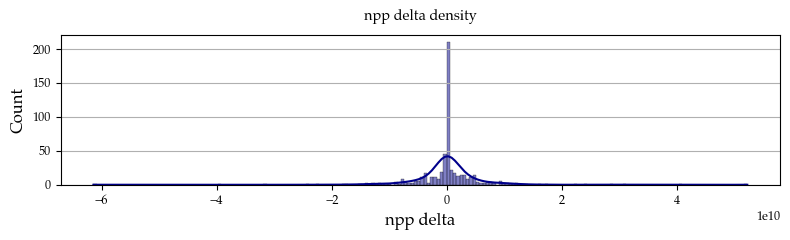

In [34]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 2.5), sharey=False, sharex=False)
ax1.grid(axis="y", which="both")

var = "npp_delta"
sns.histplot(data=state_NPPdelta_Ra_herb_InvenDelta[var],
             kde=True, bins=200, color="darkblue", ax=ax1)

ax1.title.set_text(var.replace("_", " ") + " density")
ax1.set_xlabel(var.replace("_", " "))
fig.tight_layout()

In [35]:
from scipy import stats

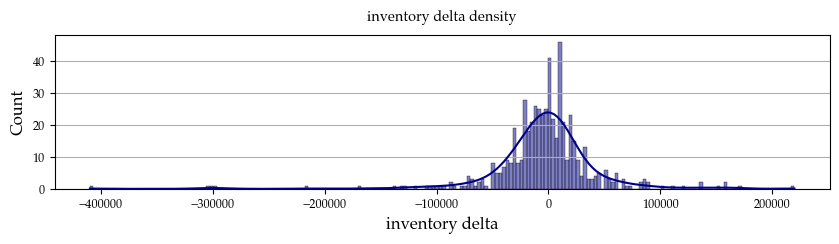

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(10, 2), sharey=False, sharex=False)
axes.grid(axis="y", which="both")

var = "inventory_delta"
sns.histplot(data=state_NPPdelta_Ra_herb_InvenDelta[var],
             kde=True, bins=200, color="darkblue", ax=axes)
axes.title.set_text(var.replace("_", " ") + " density")

axes.set_xlabel(var.replace("_", " "));

## Model

In [37]:
state_NPPdelta_Ra_herb_InvenDelta.head(2)

,state,state_fip,year,npp_delta,rangeland_acre,herb_avg,inventory_delta
0,AL,01,2002-2001,-1.470987e+07,31570.99,21.019864,13000.0
1,AL,01,2003-2002,2.145620e+07,31570.99,21.019864,11000.0


In [38]:
print(state_NPPdelta_Ra_herb_InvenDelta.year.unique().min())
yr_max = state_NPPdelta_Ra_herb_InvenDelta.year.unique().max()
print(yr_max)

2002-2001
2020-2019


In [39]:
train_df = state_NPPdelta_Ra_herb_InvenDelta[state_NPPdelta_Ra_herb_InvenDelta.year < yr_max].copy()
test_df  = state_NPPdelta_Ra_herb_InvenDelta[state_NPPdelta_Ra_herb_InvenDelta.year == yr_max].copy()

In [40]:
test_df.year.unique()

array(['2020-2019'], dtype=object)

In [41]:
train_df.year.unique().max()

'2019-2018'

In [42]:
train_df.head(2)

,state,state_fip,year,npp_delta,rangeland_acre,herb_avg,inventory_delta
0,AL,01,2002-2001,-1.470987e+07,31570.99,21.019864,13000.0
1,AL,01,2003-2002,2.145620e+07,31570.99,21.019864,11000.0


In [43]:
indp_vars_ = ["npp_delta", "rangeland_acre", "herb_avg"]
train_A = train_df[indp_vars_].values
train_A = np.hstack([train_A, np.ones(len(train_A)).reshape(-1, 1)])
print(train_A.shape)

y_var = "inventory_delta"

train_y = train_df[y_var].values.reshape(-1).astype("float")

(522, 4)


In [44]:
NPP_sol, NPP_RSS, NPP_rank, NPP_singular_vals = np.linalg.lstsq(train_A, train_y)

In [45]:
NPP_sol

array([-4.60979410e-07, -2.35013339e-04,  1.33530911e+02, -5.56884969e+03])

In [46]:
NPP_coef, Ra_coef, herb_coef, intercept = NPP_sol[0], NPP_sol[1], NPP_sol[2], NPP_sol[3]

In [47]:
NPP_RSS

array([1.24578119e+12])

### Apply to test set

In [48]:
test_A = test_df[indp_vars_].values
test_A = np.hstack([test_A, np.ones(len(test_A)).reshape(-1, 1)])
y_test = test_df[[y_var]].values.reshape(-1)

In [49]:
yhat_test = test_A @ NPP_sol

NPP_test_res = y_test - yhat_test
NPP_RSS_test = np.dot(NPP_test_res, NPP_test_res)
NPP_MSE_test = NPP_RSS_test / len(y_test)
NPP_RSE_test = np.sqrt(NPP_MSE_test)

In [50]:
print("    RSS_test = {0:.0f}.".format(NPP_RSS_test))
print("    MSE_test = {0:.0f}.".format(NPP_MSE_test))
print("    RSE =  {0:.0f}.".format(NPP_RSE_test))

    RSS_test = 24428325684.
    MSE_test = 842356058.
    RSE =  29023.
